In [1]:
import os, time
from scipy import stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
%matplotlib inline

from IPython.display import display, HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')
import pandas as pd
import numpy as np
%matplotlib inline

from IPython.display import display, HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
os.getcwd()

'D:\\sc_2050\\scripts\\summarize\\notebooks'

In [3]:
# Create timestamp to show when this summary was run
print 'Summary run: ' + time.strftime("%a, %d %b %Y %H:%M")

Summary run: Mon, 04 May 2020 17:42


In [4]:
pd.options.display.float_format = '{:0,.2f}'.format
format_percent = "{:,.2%}".format
relative_path = '../../../outputs'

# Commute Mode by Workplace Geography

In [5]:
df = pd.read_csv(os.path.join(relative_path,'validation','acs_commute_share_by_workplace_geog.csv'))

# Add mode share by work_place field
_df = df.groupby('work_place').sum()[['modeled','observed']].reset_index()
_df = _df.merge(df, on='work_place', suffixes=['_geog_total','_mode_total'])
_df['observed_mode_share'] = _df['observed_mode_total']/_df['observed_geog_total']
_df['modeled_mode_share'] = _df['modeled_mode_total']/_df['modeled_geog_total']
_df[['work_place','mode','modeled_mode_total','observed_mode_total','percent_diff','diff','modeled_mode_share','observed_mode_share']]

,work_place,mode,modeled_mode_total,observed_mode_total,percent_diff,diff,modeled_mode_share,observed_mode_share
0,Auburn,auto,51451,33431,0.54,18020,0.86,0.94
1,Auburn,transit,3998,691,4.79,3307,0.07,0.02
2,Auburn,walk_and_bike,4480,1355,2.31,3125,0.07,0.04
3,Bellevue,auto,105516,96761,0.09,8755,0.69,0.84
4,Bellevue,transit,33696,12505,1.69,21191,0.22,0.11
5,Bellevue,walk_and_bike,12811,6464,0.98,6347,0.08,0.06
6,Everett,auto,97909,81741,0.20,16168,0.78,0.92
7,Everett,transit,11329,2766,3.10,8563,0.09,0.03
8,Everett,walk_and_bike,16374,3961,3.13,12413,0.13,0.04
9,Federal Way,auto,28896,27590,0.05,1306,0.79,0.93


r^2 : 0.985076751857


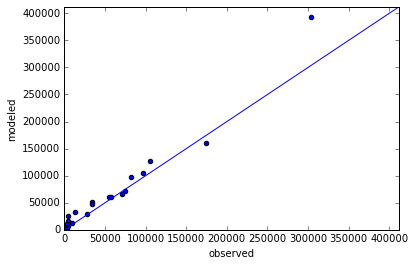

In [6]:
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print 'r^2 : ' + str(r_value)

# Commute Mode Shares by Work Place
----

In [7]:
df_tot = df.groupby(['work_place']).sum()[['modeled','observed']].reset_index()
df_shares = df.merge(df_tot, on='work_place', suffixes=['','_total'])
df_shares['mode_share_modeled'] = df_shares['modeled']/df_shares['modeled_total']
df_shares['mode_share_observed'] = df_shares['observed']/df_shares['observed_total']
df_shares.rename(columns={'mode_share_modeled': 'modeled', 'mode_share_observed': 'observed',
                         'modeled': '_', 'observed': '__'}, inplace=True)
df_shares = df_shares[['work_place','modeled','observed','mode']]
df_shares['percent_diff'] = (df_shares['modeled']-df_shares['observed'])/df_shares['observed']
df_shares['diff'] = df_shares['modeled']-df_shares['observed']

## Auto

In [8]:
_df = df_shares[df_shares['mode'] == 'auto']
_df

,work_place,modeled,observed,mode,percent_diff,diff
0,Auburn,0.86,0.94,auto,-0.09,-0.08
3,Bellevue,0.69,0.84,auto,-0.17,-0.14
6,Everett,0.78,0.92,auto,-0.16,-0.14
9,Federal Way,0.79,0.93,auto,-0.16,-0.15
12,Kent,0.87,0.92,auto,-0.06,-0.06
15,Kirkland,0.84,0.87,auto,-0.03,-0.03
18,Redmond,0.78,0.85,auto,-0.08,-0.07
21,Renton,0.81,0.91,auto,-0.10,-0.09
24,Seattle,0.63,0.55,auto,0.14,0.08
27,Tacoma,0.78,0.94,auto,-0.16,-0.15


r^2 : 0.816111851065


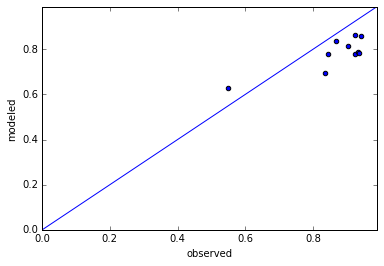

In [9]:
ax = _df.plot(kind='scatter', x='observed', y='modeled')
lim = _df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
print 'r^2 : ' + str(r_value)

## Transit

In [10]:
_df = df_shares[df_shares['mode'] == 'transit']
_df

,work_place,modeled,observed,mode,percent_diff,diff
1,Auburn,0.07,0.02,transit,2.43,0.05
4,Bellevue,0.22,0.11,transit,1.05,0.11
7,Everett,0.09,0.03,transit,1.88,0.06
10,Federal Way,0.12,0.00,transit,32.34,0.12
13,Kent,0.06,0.05,transit,0.32,0.02
16,Kirkland,0.06,0.09,transit,-0.26,-0.02
19,Redmond,0.15,0.11,transit,0.38,0.04
22,Renton,0.08,0.04,transit,0.81,0.03
25,Seattle,0.26,0.32,transit,-0.18,-0.06
28,Tacoma,0.06,0.03,transit,1.23,0.04


r^2 : 0.801553987603


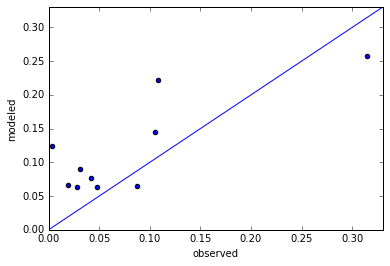

In [11]:
ax = _df.plot(kind='scatter', x='observed', y='modeled')
lim = _df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
print 'r^2 : ' + str(r_value)

## Walk and Bike

In [12]:
_df = df_shares[df_shares['mode'] == 'walk_and_bike']
_df

,work_place,modeled,observed,mode,percent_diff,diff
2,Auburn,0.07,0.04,walk_and_bike,0.96,0.04
5,Bellevue,0.08,0.06,walk_and_bike,0.51,0.03
8,Everett,0.13,0.04,walk_and_bike,1.91,0.09
11,Federal Way,0.09,0.06,walk_and_bike,0.45,0.03
14,Kent,0.07,0.03,walk_and_bike,1.61,0.04
17,Kirkland,0.10,0.05,walk_and_bike,1.14,0.05
20,Redmond,0.07,0.05,walk_and_bike,0.52,0.03
23,Renton,0.11,0.05,walk_and_bike,1.09,0.06
26,Seattle,0.11,0.14,walk_and_bike,-0.16,-0.02
29,Tacoma,0.15,0.03,walk_and_bike,3.41,0.12


r^2 : 0.135492690321


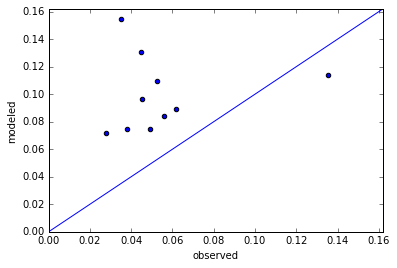

In [13]:
ax = _df.plot(kind='scatter', x='observed', y='modeled')
lim = _df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
print 'r^2 : ' + str(r_value)

# Commute Mode Share by Home Tract
----

In [14]:
df = pd.read_csv(os.path.join(relative_path,'validation','acs_commute_share_by_home_tract.csv'))
pd.options.display.float_format = '{:0,.0f}'.format

In [15]:
df_county = df.groupby('CountyName').sum()[['modeled','observed']].reset_index()
df_county

,CountyName,modeled,observed
0,King,"1,428,972","1,047,042"
1,Kitsap,"132,560","112,655"
2,Pierce,"362,160","366,722"
3,Snohomish,"378,135","368,051"


In [16]:
def calculate_shares(df, geog_col, apply_format=False):
    
    df[['modeled','observed']] = df[['modeled','observed']].astype('int')
    df_total = df.groupby(geog_col).sum()[['modeled','observed']].reset_index()
    df_total.rename(columns={'modeled': 'modeled_total','observed':'observed_total'}, inplace=True)
    df = df.merge(df_total, on=geog_col, how='left')
    df['modeled_share'] = df['modeled']*1.0/df['modeled_total']
    df['observed_share'] = df['observed']*1.0/df['observed_total']
    if apply_format:
        df[['modeled_share','observed_share']] = df[['modeled_share','observed_share']].applymap(format_percent)
    
    return df

In [17]:
df_county_mode = df.groupby(['CountyName','mode']).sum()[['modeled','observed']].reset_index()
df_county_mode = calculate_shares(df_county_mode, 'CountyName', apply_format=True)
# Shares by Tract
df_tract = df[['geoid','mode','modeled','observed']]
df_tract_shares = calculate_shares(df_tract, 'geoid')

## SOV

 r^2: 0.779674281311


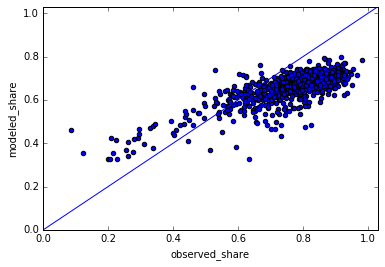

In [18]:
# Show only SOV
sov_tract_shares = df_tract_shares[df_tract_shares['mode'] == 'SOV']
sov_tract_shares = sov_tract_shares[-sov_tract_shares.observed_share.isnull()]

_df = sov_tract_shares.copy()
ax = _df.plot(kind='scatter', x='observed_share', y='modeled_share')
lim = _df[['observed_share','modeled_share']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_share'],_df['modeled_share'])
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
print ' r^2: ' + str(r_value)

## HOV

 r^2: 0.277107804281


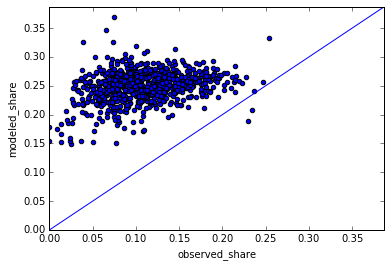

In [19]:
# Show only SOV
sov_tract_shares = df_tract_shares[df_tract_shares['mode'] == 'HOV']
sov_tract_shares = sov_tract_shares[-sov_tract_shares.observed_share.isnull()]

_df = sov_tract_shares.copy()
ax = _df.plot(kind='scatter', x='observed_share', y='modeled_share')
lim = _df[['observed_share','modeled_share']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_share'],_df['modeled_share'])
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
print ' r^2: ' + str(r_value)

## Transit

 r^2: 0.641462896173


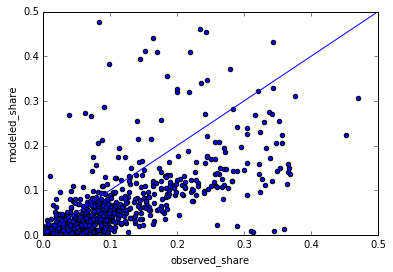

In [20]:
# Show only SOV
sov_tract_shares = df_tract_shares[df_tract_shares['mode'] == 'Transit']
sov_tract_shares = sov_tract_shares[-sov_tract_shares.observed_share.isnull()]

_df = sov_tract_shares.copy()
ax = _df.plot(kind='scatter', x='observed_share', y='modeled_share')
lim = _df[['observed_share','modeled_share']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_share'],_df['modeled_share'])
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
print ' r^2: ' + str(r_value)

## Walk

 r^2: 0.431831292155


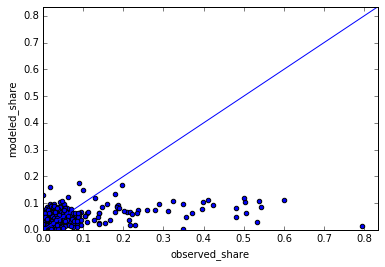

In [21]:
# Show only SOV
sov_tract_shares = df_tract_shares[df_tract_shares['mode'] == 'Walk']
sov_tract_shares = sov_tract_shares[-sov_tract_shares.observed_share.isnull()]

_df = sov_tract_shares.copy()
ax = _df.plot(kind='scatter', x='observed_share', y='modeled_share')
lim = _df[['observed_share','modeled_share']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_share'],_df['modeled_share'])
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
print ' r^2: ' + str(r_value)

# Commute Flow
----

In [22]:
df = pd.read_csv(os.path.join(relative_path,'validation','district_worker_flows.csv'))
# Load district names
df_lookup = pd.read_csv(r'../../../inputs/model/lookup/TAZ_TAD_County.csv')

In [23]:
df = df.merge(df_lookup[['District','New DistrictName']], left_on='District_o', right_on='District')
df.rename(columns={'New DistrictName': 'Origin District'}, inplace=True)
df = df.merge(df_lookup[['District','New DistrictName']], left_on='District_d', right_on='District')
df.rename(columns={'New DistrictName': 'Destination District'}, inplace=True)
df = df[['District_o','District_d','Origin District','Destination District','modeled','observed']]

r^2 : 0.986337474895


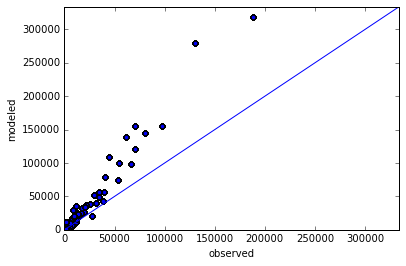

In [24]:
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print 'r^2 : ' + str(r_value)

Modeled

In [25]:
df_m = pd.pivot_table(df, index='Origin District', columns='Destination District', values='modeled')
df_m

Destination District,East Side,Everett-Lynwood-Edmonds,Kitsap,North Seattle-Shoreline,Renton-FedWay-Kent,S.Kitsap,Seattle CBD,South Pierce,Suburban Snohomish,Tacoma,West-South Seattle
Origin District,,,,,,,,,,,
East Side,"318,205","12,801",53,"19,850","37,104",4,"43,087",866,"12,432",759,"18,850"
Everett-Lynwood-Edmonds,"22,251","139,517",147,"26,553","1,967",nan,"20,699",41,"22,737",56,"4,227"
Kitsap,620,111,"144,859",540,191,"3,494","6,054",81,11,217,462
North Seattle-Shoreline,"26,359","14,189",132,"98,186","6,920",nan,"73,897",102,"3,009",190,"17,175"
Renton-FedWay-Kent,"40,393",816,121,"7,187","279,145",109,"20,803","19,359",426,"17,472","38,133"
S.Kitsap,41,1,"11,875",17,402,"20,143",29,"1,126",nan,"2,068",70
Seattle CBD,"24,700","2,245",111,"36,179","9,615",1,"121,196",129,501,225,"29,228"
South Pierce,"4,547",107,409,877,"57,206",965,"2,921","155,943",68,"78,516","4,478"
Suburban Snohomish,"52,512","100,138",69,"15,777","2,556",3,"11,135",61,"155,184",50,"2,749"


Observed

In [26]:
df_o = pd.pivot_table(df, index='Origin District', columns='Destination District', values='observed')
df_o

Destination District,East Side,Everett-Lynwood-Edmonds,Kitsap,North Seattle-Shoreline,Renton-FedWay-Kent,S.Kitsap,Seattle CBD,South Pierce,Suburban Snohomish,Tacoma,West-South Seattle
Origin District,,,,,,,,,,,
East Side,"188,214","8,517",228,"10,654","21,988",28,"38,816",993,"5,873",987,"13,125"
Everett-Lynwood-Edmonds,"12,574","61,446",340,"11,647","3,489",nan,"11,955",296,"15,234",201,"3,255"
Kitsap,"1,306",691,"80,004",783,"1,809","1,621","4,958","1,180",64,"2,328","2,014"
North Seattle-Shoreline,"19,816","9,453",343,"66,117","7,768",nan,"53,446",361,"3,151",459,"11,591"
Renton-FedWay-Kent,"31,684","2,619",281,"8,182","129,832",255,"27,571","9,139",780,"7,790","25,502"
S.Kitsap,307,60,"1,973",224,"1,448","9,108",417,"3,105",nan,"5,255",577
Seattle CBD,"16,628","2,025",159,"11,996","5,284",10,"70,449",274,580,520,"8,607"
South Pierce,"4,515",669,"1,186","1,386","34,551","1,347","5,725","97,602",270,"39,995","5,321"
Suburban Snohomish,"29,472","54,721",261,"8,918","4,840",23,"12,011",473,"70,611",344,"4,306"


Difference

In [27]:
df_m - df_o

Destination District,East Side,Everett-Lynwood-Edmonds,Kitsap,North Seattle-Shoreline,Renton-FedWay-Kent,S.Kitsap,Seattle CBD,South Pierce,Suburban Snohomish,Tacoma,West-South Seattle
Origin District,,,,,,,,,,,
East Side,"129,991","4,284",-175,"9,196","15,116",-24,"4,271",-127,"6,559",-228,"5,725"
Everett-Lynwood-Edmonds,"9,677","78,071",-193,"14,906","-1,522",nan,"8,744",-255,"7,503",-145,972
Kitsap,-686,-580,"64,855",-243,"-1,618","1,873","1,096","-1,099",-53,"-2,111","-1,552"
North Seattle-Shoreline,"6,543","4,736",-211,"32,069",-848,nan,"20,451",-259,-142,-269,"5,584"
Renton-FedWay-Kent,"8,709","-1,803",-160,-995,"149,313",-146,"-6,768","10,220",-354,"9,682","12,631"
S.Kitsap,-266,-59,"9,902",-207,"-1,046","11,035",-388,"-1,979",nan,"-3,187",-507
Seattle CBD,"8,072",220,-48,"24,183","4,331",-9,"50,747",-145,-79,-295,"20,621"
South Pierce,32,-562,-777,-509,"22,655",-382,"-2,804","58,341",-202,"38,521",-843
Suburban Snohomish,"23,040","45,417",-192,"6,859","-2,284",-20,-876,-412,"84,573",-294,"-1,557"


Percent Difference

In [28]:
pd.options.display.float_format = '{:0,.2f}'.format
(df_m - df_o)/df_o

Destination District,East Side,Everett-Lynwood-Edmonds,Kitsap,North Seattle-Shoreline,Renton-FedWay-Kent,S.Kitsap,Seattle CBD,South Pierce,Suburban Snohomish,Tacoma,West-South Seattle
Origin District,,,,,,,,,,,
East Side,0.69,0.50,-0.77,0.86,0.69,-0.86,0.11,-0.13,1.12,-0.23,0.44
Everett-Lynwood-Edmonds,0.77,1.27,-0.57,1.28,-0.44,nan,0.73,-0.86,0.49,-0.72,0.30
Kitsap,-0.53,-0.84,0.81,-0.31,-0.89,1.16,0.22,-0.93,-0.83,-0.91,-0.77
North Seattle-Shoreline,0.33,0.50,-0.62,0.49,-0.11,nan,0.38,-0.72,-0.05,-0.59,0.48
Renton-FedWay-Kent,0.27,-0.69,-0.57,-0.12,1.15,-0.57,-0.25,1.12,-0.45,1.24,0.50
S.Kitsap,-0.87,-0.98,5.02,-0.92,-0.72,1.21,-0.93,-0.64,nan,-0.61,-0.88
Seattle CBD,0.49,0.11,-0.30,2.02,0.82,-0.90,0.72,-0.53,-0.14,-0.57,2.40
South Pierce,0.01,-0.84,-0.66,-0.37,0.66,-0.28,-0.49,0.60,-0.75,0.96,-0.16
Suburban Snohomish,0.78,0.83,-0.74,0.77,-0.47,-0.87,-0.07,-0.87,1.20,-0.85,-0.36
